In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize weights and biases with random values between -1 and 2
        self.w00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)  # Random between -1 and 2
        self.b00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.b01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.b02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w11 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.w12 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.w13 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w20 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)  # Random between -1 and 2

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = torch.sigmoid(input_to_layer_01)  # Using sigmoid activation
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = torch.sigmoid(input_to_layer_02)  # Using sigmoid activation
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = torch.sigmoid(input_to_layer_03)  # Using sigmoid activation
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = torch.tanh(output)  # Applying tanh on the final output
        output = output * self.w20
        return output


In [3]:
my_model = SimpleNN()

In [4]:
X = torch.linspace(start=1, end=2.5, steps=40)
X

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [5]:
Y = my_model(X)
Y

tensor([-0.5939, -0.5952, -0.5965, -0.5977, -0.5988, -0.5999, -0.6010, -0.6020,
        -0.6030, -0.6039, -0.6047, -0.6056, -0.6064, -0.6071, -0.6078, -0.6085,
        -0.6092, -0.6098, -0.6104, -0.6109, -0.6115, -0.6120, -0.6125, -0.6130,
        -0.6134, -0.6138, -0.6143, -0.6147, -0.6150, -0.6154, -0.6158, -0.6161,
        -0.6164, -0.6167, -0.6170, -0.6173, -0.6176, -0.6179, -0.6181, -0.6184])

Text(0, 0.5, 'Y')

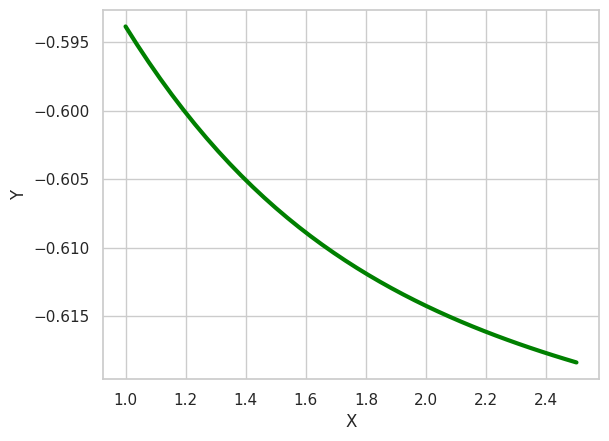

In [6]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=Y,
    color='green',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [7]:
class Simple2NN(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize weights and biases with random values between -1 and 2
        self.w00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)  # Random between -1 and 2
        self.b00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)

        self.w01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)
        self.b01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)

        self.w02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)  # Random between -1 and 2
        self.b02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)

        self.w11 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)
        self.w12 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)
        self.w13 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)

        self.w20 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)  # Random between -1 and 2

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = torch.sigmoid(input_to_layer_01)  # Using sigmoid activation
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = torch.sigmoid(input_to_layer_02)  # Using sigmoid activation
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = torch.sigmoid(input_to_layer_03)  # Using sigmoid activation
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = torch.tanh(output)  # Applying tanh on the final output
        output = output * self.w20
        return output

In [8]:
simple2NN = Simple2NN()

In [9]:
newY=simple2NN(X)

In [10]:
newY

tensor([1.2839, 1.2851, 1.2863, 1.2874, 1.2884, 1.2893, 1.2902, 1.2910, 1.2918,
        1.2924, 1.2931, 1.2937, 1.2942, 1.2947, 1.2952, 1.2956, 1.2959, 1.2963,
        1.2966, 1.2969, 1.2971, 1.2974, 1.2976, 1.2978, 1.2979, 1.2981, 1.2982,
        1.2983, 1.2984, 1.2984, 1.2985, 1.2986, 1.2986, 1.2986, 1.2986, 1.2986,
        1.2986, 1.2986, 1.2986, 1.2986], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

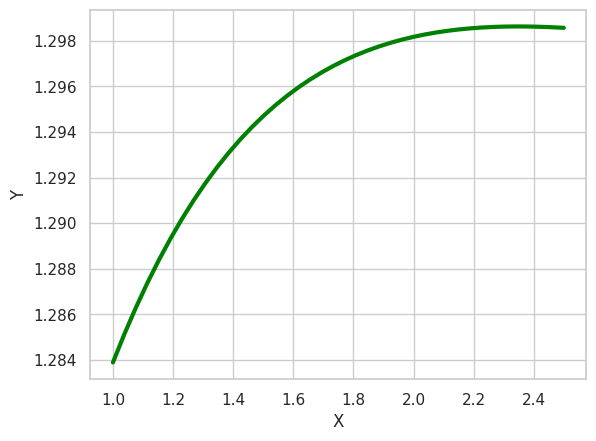

In [11]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=newY.detach(),
    color='green',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [12]:
optimizer = SGD(simple2NN.parameters(), lr=0.01)
loss = nn.MSELoss()

In [13]:
for epoch in range(100):
    total_loss = 0

    for i in range(len(X)):
        input_i = X[i]
        actual_output_i = Y[i]

        pred_output_i = simple2NN(input_i)

        loss_value = loss(pred_output_i, actual_output_i)

        loss_value.backward()

        total_loss += loss_value

    print('Epoch: ', epoch, ' | Total Loss: ', total_loss)
    optimizer.step()
    optimizer.zero_grad()



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  0  | Total Loss:  tensor(145.0985, grad_fn=<AddBackward0>)
Epoch:  1  | Total Loss:  tensor(12.0563, grad_fn=<AddBackward0>)
Epoch:  2  | Total Loss:  tensor(1.7875, grad_fn=<AddBackward0>)
Epoch:  3  | Total Loss:  tensor(0.2348, grad_fn=<AddBackward0>)
Epoch:  4  | Total Loss:  tensor(0.0285, grad_fn=<AddBackward0>)
Epoch:  5  | Total Loss:  tensor(0.0038, grad_fn=<AddBackward0>)
Epoch:  6  | Total Loss:  tensor(0.0010, grad_fn=<AddBackward0>)
Epoch:  7  | Total Loss:  tensor(0.0006, grad_fn=<AddBackward0>)
Epoch:  8  | Total Loss:  tensor(0.0006, grad_fn=<AddBackward0>)
Epoch:  9  | Total Loss:  tensor(0.0006, grad_fn=<AddBackward0>)
Epoch:  10  | Total Loss:  tensor(0.0006, grad_fn=<AddBackward0>)
Epoch:  11  | Total Loss:  tensor(0.0006, grad_fn=<AddBackward0>)
Epoch:  12  | Total Loss:  tensor(0.0006, grad_fn=<AddBackward0>)
Epoch:  13  | Total Loss:  tensor(0.0006, grad_fn=<AddBackward0>)
Epoch:  14  | Total Loss:  tensor(0.0006, grad_fn=<AddBackward0>)
Epoch:  15  | Tot

In [14]:
pred_y = simple2NN(X)
pred_y

tensor([-0.6006, -0.6016, -0.6025, -0.6034, -0.6042, -0.6049, -0.6056, -0.6062,
        -0.6068, -0.6074, -0.6079, -0.6084, -0.6088, -0.6092, -0.6096, -0.6099,
        -0.6102, -0.6105, -0.6107, -0.6109, -0.6112, -0.6113, -0.6115, -0.6116,
        -0.6118, -0.6119, -0.6120, -0.6121, -0.6121, -0.6122, -0.6122, -0.6123,
        -0.6123, -0.6123, -0.6123, -0.6123, -0.6123, -0.6123, -0.6123, -0.6123],
       grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

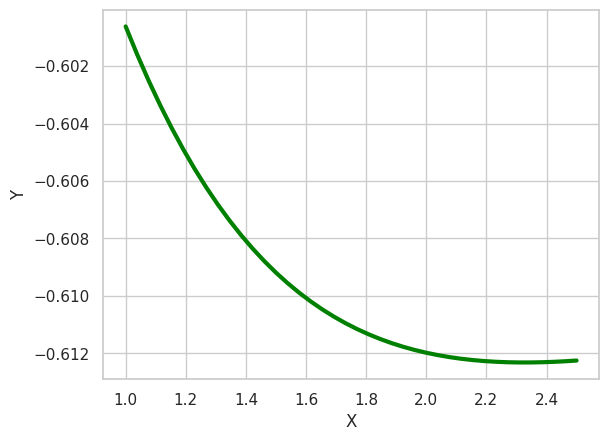

In [15]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=pred_y.detach(),
    color='green',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')